In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_features(dataframe, row=False):
    df_feat = dataframe.copy()
    
    df_feat["Upper_Shadow"] = df_feat["high"] - np.maximum(df_feat["close"], df_feat["open"])
    df_feat["Lower_Shadow"] = np.minimum(df_feat["close"], df_feat["open"]) - df_feat["low"]

    df_feat["close/open"] = df_feat["close"] / df_feat["open"] 
    df_feat["close-open"] = df_feat["close"] - df_feat["open"] 
    df_feat["high-low"] = df_feat["high"] - df_feat["low"] 
    df_feat["high/low"] = df_feat["high"] / df_feat["low"]
    
    if row:
        df_feat['mean'] = df_feat[['open', 'high', 'low', 'close']].mean()
    else:
        df_feat['mean'] = df_feat[['open', 'high', 'low', 'close']].mean(axis=1)

    df_feat["high/mean"] = df_feat["high"] / df_feat["mean"]
    df_feat["low/mean"] = df_feat["low"] / df_feat["mean"]
    df_feat["volume/tradecount"] = df_feat["volume"] / (df_feat["tradecount"] + 1)

    if row:
        df_feat["median"] = df_feat[['open', 'high', 'low', 'close']].median()
    else:
        df_feat["median"] = df_feat[['open', 'high', 'low', 'close']].median(axis=1)
    df_feat["high/median"] = df_feat["high"] / df_feat["median"]
    df_feat["low/median"] = df_feat["low"] / df_feat["median"]

    for col in ['open', 'high', 'low', 'close']:
        df_feat[f"Log_1p_{col}"] = np.log1p(df_feat[col])
        
    return df_feat

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [65]:
ada = pd.read_csv('Binance_ADAUSDT_2022_minute.csv', skiprows = 1, parse_dates = ['date'])[::-1]
ada = ada.rename({'Volume ADA': 'volume'}, axis = 1)
ada = ada.drop(['Volume USDT'], axis = 1)
ada = ada.reset_index(drop = True)
ada

,unix,date,symbol,open,high,low,close,volume,tradecount
0,1640995260000,2022-01-01 00:01:00,ADA/USDT,1.3100,1.3140,1.3080,1.3120,132189.4,182
1,1640995320000,2022-01-01 00:02:00,ADA/USDT,1.3120,1.3180,1.3110,1.3170,708964.2,686
2,1640995380000,2022-01-01 00:03:00,ADA/USDT,1.3170,1.3170,1.3150,1.3150,219213.9,196
3,1640995440000,2022-01-01 00:04:00,ADA/USDT,1.3160,1.3160,1.3140,1.3140,50590.0,79
4,1640995500000,2022-01-01 00:05:00,ADA/USDT,1.3150,1.3180,1.3130,1.3180,75423.5,133
...,...,...,...,...,...,...,...,...,...
479984,1669794300000,2022-11-30 07:45:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,8059.2,15
479985,1669794360000,2022-11-30 07:46:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,14764.1,30
479986,1669794420000,2022-11-30 07:47:00,ADA/USDT,0.3148,0.3148,0.3146,0.3147,67688.5,70
479987,1669794480000,2022-11-30 07:48:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,18877.0,29


In [66]:
ada = get_features(ada)
ada

,unix,date,symbol,open,high,low,close,volume,tradecount,Upper_Shadow,...,high/mean,low/mean,volume/tradecount,median,high/median,low/median,Log_1p_open,Log_1p_high,Log_1p_low,Log_1p_close
0,1640995260000,2022-01-01 00:01:00,ADA/USDT,1.3100,1.3140,1.3080,1.3120,132189.4,182,0.002,...,1.002288,0.997712,722.346448,1.31100,1.002288,0.997712,0.837248,0.838978,0.836381,0.838113
1,1640995320000,2022-01-01 00:02:00,ADA/USDT,1.3120,1.3180,1.3110,1.3170,708964.2,686,0.001,...,1.002663,0.997337,1031.971179,1.31450,1.002663,0.997337,0.838113,0.840705,0.837680,0.840273
2,1640995380000,2022-01-01 00:03:00,ADA/USDT,1.3170,1.3170,1.3150,1.3150,219213.9,196,0.000,...,1.000760,0.999240,1112.760914,1.31600,1.000760,0.999240,0.840273,0.840273,0.839410,0.839410
3,1640995440000,2022-01-01 00:04:00,ADA/USDT,1.3160,1.3160,1.3140,1.3140,50590.0,79,0.000,...,1.000760,0.999240,632.375000,1.31500,1.000760,0.999240,0.839842,0.839842,0.838978,0.838978
4,1640995500000,2022-01-01 00:05:00,ADA/USDT,1.3150,1.3180,1.3130,1.3180,75423.5,133,0.000,...,1.001520,0.997720,562.861940,1.31650,1.001139,0.997341,0.839410,0.840705,0.838545,0.840705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479984,1669794300000,2022-11-30 07:45:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,8059.2,15,0.000,...,1.000079,0.999762,503.700000,0.31480,1.000000,0.999682,0.273685,0.273685,0.273609,0.273685
479985,1669794360000,2022-11-30 07:46:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,14764.1,30,0.000,...,1.000079,0.999762,476.261290,0.31480,1.000000,0.999682,0.273685,0.273685,0.273609,0.273685
479986,1669794420000,2022-11-30 07:47:00,ADA/USDT,0.3148,0.3148,0.3146,0.3147,67688.5,70,0.000,...,1.000238,0.999603,953.359155,0.31475,1.000159,0.999523,0.273685,0.273685,0.273532,0.273609
479987,1669794480000,2022-11-30 07:48:00,ADA/USDT,0.3148,0.3148,0.3147,0.3148,18877.0,29,0.000,...,1.000079,0.999762,629.233333,0.31480,1.000000,0.999682,0.273685,0.273685,0.273609,0.273685


<AxesSubplot:>

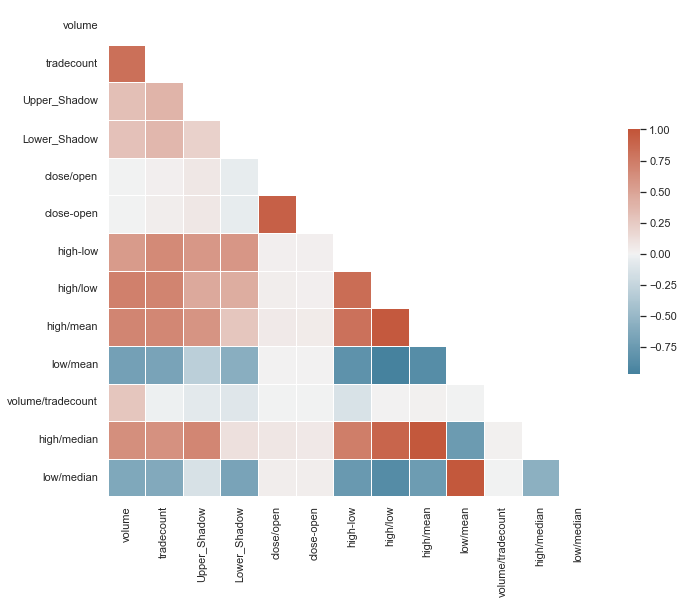

In [81]:
sns.set_theme(style="white")
forcorr = ada.drop(
    ['unix', 'open', 'low', 'high', 'close', 'mean', 'median',
     'Log_1p_open', 'Log_1p_high', 'Log_1p_low', 'Log_1p_close'], axis = 1
)
corr = forcorr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [142]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression

In [95]:
ada['smove'] = ada.close - ada.open.shift()
ada = ada.dropna(axis = 0)

In [110]:
ada.columns[3:]

Index(['open', 'high', 'low', 'close', 'volume', 'tradecount', 'Upper_Shadow',
       'Lower_Shadow', 'close/open', 'close-open', 'high-low', 'high/low',
       'mean', 'high/mean', 'low/mean', 'volume/tradecount', 'median',
       'high/median', 'low/median', 'Log_1p_open', 'Log_1p_high', 'Log_1p_low',
       'Log_1p_close', 'smove'],
      dtype='object')

In [121]:
xcols = ada.columns[3:-1] # excluding unix, date, symbol and shifted move 'smove'
print("features: ", xcols.to_list())
ycol = 'smove'
print("target: ", ycol)

features:  ['open', 'high', 'low', 'close', 'volume', 'tradecount', 'Upper_Shadow', 'Lower_Shadow', 'close/open', 'close-open', 'high-low', 'high/low', 'mean', 'high/mean', 'low/mean', 'volume/tradecount', 'median', 'high/median', 'low/median', 'Log_1p_open', 'Log_1p_high', 'Log_1p_low', 'Log_1p_close']
target:  smove


In [123]:
x = ada[xcols] 
y = ada[ycol] 

### Mutual information

In [128]:
mir = mutual_info_regression(x, y)
pd.DataFrame.from_dict({
    'mir' : mir, 
    'feature' : xcols,
}).sort_values(by='mir', ascending = False)

,mir,feature
9,0.712950,close-open
10,0.660041,high-low
8,0.572880,close/open
22,0.506698,Log_1p_close
3,0.505190,close
1,0.504997,high
20,0.504658,Log_1p_high
2,0.504177,low
21,0.503907,Log_1p_low
0,0.503645,open


### Pearson's correlation

In [145]:
pearson = r_regression(x, y)
pd.DataFrame.from_dict({
    'pearson' : pearson, 
    'feature' : xcols,
}).sort_values(by='pearson', ascending = False)

,pearson,feature
9,0.691855,close-open
8,0.644686,close/open
17,0.028466,high/median
5,0.026591,tradecount
13,0.022153,high/mean
10,0.014028,high-low
11,0.013690,high/low
6,0.013024,Upper_Shadow
3,0.006393,close
22,0.006135,Log_1p_close


Most importance feature seems to be previous timestep's move: smove[t-1]

## grid search on Logistic regressor

<AxesSubplot:>

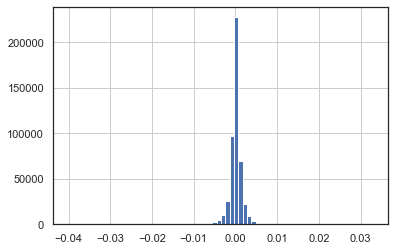

In [150]:
ada['smove'].hist(bins = 70)

In [152]:
label = ada.smove > 0.0

In [159]:
labels = []
for i in ada.smove:
    if i < 0:
        labels.append(1)
    if i == 0:
        labels.append(2)
    if i > 0:
        labels.append(3)
        
# 1 - move downwards
# 2 - no move
# 3 - move upwards

In [209]:
split = int(ada.shape[0]*0.7)
xtrain, xtest = ada[xcols][:split], ada[xcols][split:]
ytrain, ytest = labels[:split], labels[split:]
print("Train shapes: ", xtrain.shape[0], len(ytrain))
print("Test shapes: ", xtest.shape[0], len(ytest))

Train shapes:  335991 335991
Test shapes:  143997 143997


In [188]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
pipe = Pipeline(
    [
        ("standard", StandardScaler()), 
        ("LR", LogisticRegression(random_state=0, max_iter = 1000000)),
    ]
)

grid = dict(
    LR__C = [0.01, 0.1, 1, 10, 100],
)

csearch = GridSearchCV(pipe, param_grid=grid, verbose=4, cv = 10).fit(xtrain.values, ytrain)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END .......................LR__C=0.01;, score=0.628 total time=   6.7s
[CV 2/10] END .......................LR__C=0.01;, score=0.615 total time=   6.1s
[CV 3/10] END .......................LR__C=0.01;, score=0.630 total time=   7.7s
[CV 4/10] END .......................LR__C=0.01;, score=0.583 total time=   6.3s
[CV 5/10] END .......................LR__C=0.01;, score=0.561 total time=   6.1s
[CV 6/10] END .......................LR__C=0.01;, score=0.639 total time=   5.9s
[CV 7/10] END .......................LR__C=0.01;, score=0.644 total time=   5.8s
[CV 8/10] END .......................LR__C=0.01;, score=0.635 total time=   5.9s
[CV 9/10] END .......................LR__C=0.01;, score=0.630 total time=   6.1s
[CV 10/10] END ......................LR__C=0.01;, score=0.639 total time=   6.8s
[CV 1/10] END ........................LR__C=0.1;, score=0.638 total time=   7.1s
[CV 2/10] END ........................LR__C=0.1;

In [201]:
print("Best accuracy in test data: %.3f" % csearch.score(xtest, ytest))

Best accuracy in test data: 0.670


/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [202]:
pred = csearch.predict(xtest)

/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.11628020028195032

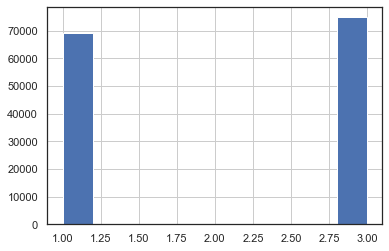

In [215]:
pd.Series(csearch.predict(xtest)).hist()
sum([True for i in ytest if i == 2]) / len(ytest)
# Label 2 (no movement) was never guessed, although it was 11.6% of test data

In [217]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           1       0.74      0.68      0.71     69074
           2       0.00      0.00      0.00         0
           3       0.78      0.66      0.71     74923

    accuracy                           0.67    143997
   macro avg       0.51      0.45      0.47    143997
weighted avg       0.76      0.67      0.71    143997



/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
print('Overall accuracy: ',  100*sum(ytest == pred) / len(ytest))

Overall accuracy:  66.96458954005986
